In [10]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [11]:
hin = gpd.read_file('High_Injury_Network.zip')

In [12]:
type(hin)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

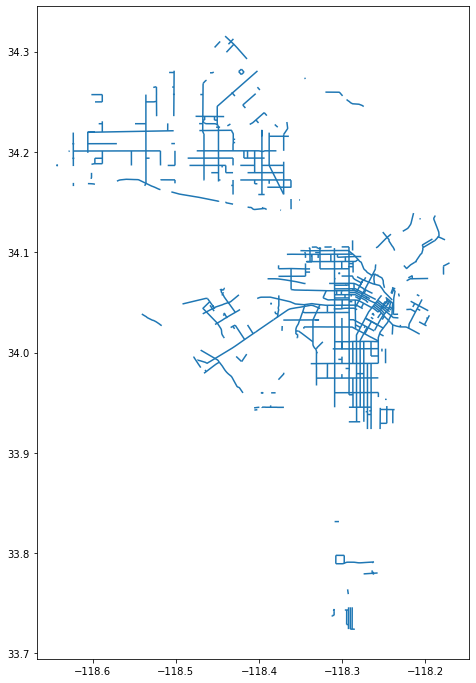

In [13]:
hin.plot(figsize=(12,12))

In [9]:
hin.head()

,OBJECTID,STNAME,Shape_Leng,Shape_Le_1,FROM_,TO_,GlobalID,geometry
0,1,CENTURY BLVD,8086.422780,8086.422780,VERMONT AVE,AVALON BLVD,bb3983d2-6187-447e-9496-f91f9e1e47dc,"LINESTRING (-118.29183 33.94550, -118.28263 33..."
1,2,FIGUEROA ST,10094.733456,1.911881,COLORADO BLVD,AVENUE 61,acb098aa-5d7d-480f-804f-bb4e3731d37a,"LINESTRING (-118.18844 34.11174, -118.18831 34..."
2,3,103RD ST,5221.430950,5221.430950,CENTRAL AVE,GRAPE ST\r\nGRAPE,b6274f91-d568-49ff-91cf-5ff41e23afa4,"LINESTRING (-118.23689 33.94315, -118.23752 33..."
3,4,MARENGO ST,1031.346095,1031.346095,STATE ST,CUMMINGS ST,35ea94e3-3210-4610-bd16-5d6f8e37e7ce,"LINESTRING (-118.21017 34.05783, -118.20927 34..."
4,5,ALAMEDA ST,8611.911036,8611.911036,6TH ST,ALPINE ST\r\nALPINE,c9633073-47a3-4057-8023-c0467de5d6eb,"LINESTRING (-118.23630 34.06166, -118.23664 34..."


In [11]:
hin.shape

(386, 8)

In [12]:
hin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    386 non-null    int64   
 1   STNAME      386 non-null    object  
 2   Shape_Leng  386 non-null    float64 
 3   Shape_Le_1  386 non-null    float64 
 4   FROM_       371 non-null    object  
 5   TO_         371 non-null    object  
 6   GlobalID    386 non-null    object  
 7   geometry    386 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 24.2+ KB


In [18]:
lac = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

In [19]:
type(lac)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

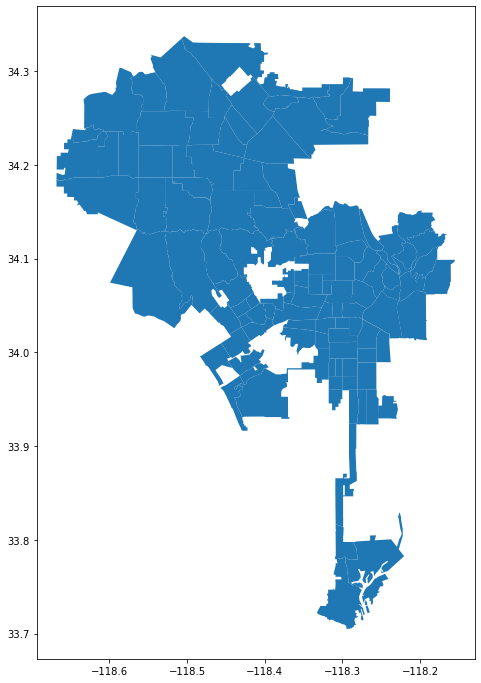

In [20]:
lac.plot(figsize=(12,12))

In [22]:
import contextily as ctx
import matplotlib.pyplot as plt

In [28]:
lac_wm = lac.to_crs(epsg=3857)
hin_wm = hin.to_crs(epsg=3857)

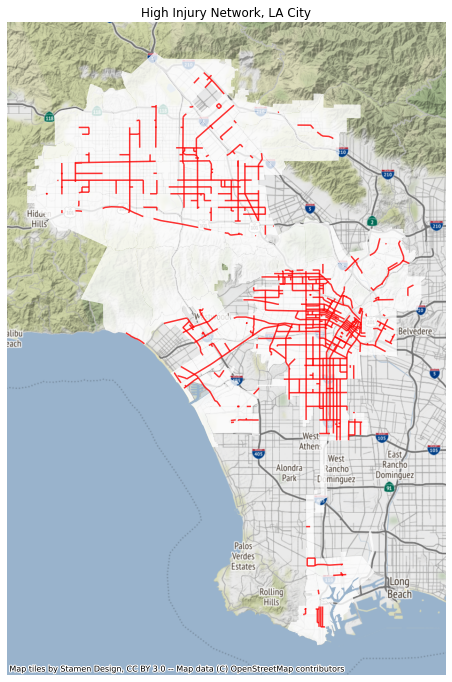

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
lac_wm.plot(
    ax=ax, 
    color="white",
    alpha=0.8
)

hin_wm.plot(
    ax=ax, 
    color="red",
    alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('High Injury Network, LA City')

# add a basemap
ctx.add_basemap(ax)

In [1]:
import folium

In [8]:
m = folium.Map(location=[34.01187554166666,-118.24713253124999], zoom_start=10)
m

In [21]:
from shapely.geometry import LineString, shape

In [46]:
list(hin.geometry.iloc[0].coords)

[(-118.291834561654, 33.9454965311427),
 (-118.282625545576, 33.9455340883266),
 (-118.278364134057, 33.9455531150163),
 (-118.269530647784, 33.9455968294889),
 (-118.265173282474, 33.9456037837016)]

In [72]:
for index, row in hin.iterrows():
    cords = []
    geos = list(hin.geometry.iloc[0].coords)
    cords.append(geos)
type(cords)

list

**After 3 hours of research, I've come up with no solution to plotting lines on a folium map.**